In [30]:
#imports
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.preprocessing.image import img_to_array, array_to_img
import pathlib

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Concatenate, Dense, LSTM, Input, concatenate
import random

In [3]:
#../Project/Brain_Scans_CSV/CN_and_AD_1_21_2022.csv
#ADNI1_Complete_1Yr_1.5T_1_26_2022.csv

with open('../Project/Brain_Scans_CSV/ADNI1_Complete_1Yr_1.5T_1_26_2022.csv', 'rb') as x:
         clean_lines = (line.replace(b'"',b',') for line in x)
         data_age = np.genfromtxt(clean_lines,delimiter=',',dtype=None,
                         encoding=None,usecols=(13),skip_header=1)

#data_age = data_age.astype(np.float)
with open('../Project/Brain_Scans_CSV/ADNI1_Complete_1Yr_1.5T_1_26_2022.csv', 'rb') as x:
         lines = (line.replace(b'"',b',') for line in x)
         data_group = np.genfromtxt(lines,delimiter=',',dtype=None,
                         encoding=None,usecols=(2),
                         skip_header=1)
#data_group = np.genfromtxt("../Project/Brain_Scans_CSV/CN_and_AD_1_21_2022.csv",delimiter=',',dtype=None,usecols=(2),skip_header=1)

print(data_group)



[(False,) (False,) (False,) ... (False,) (False,) (False,)]


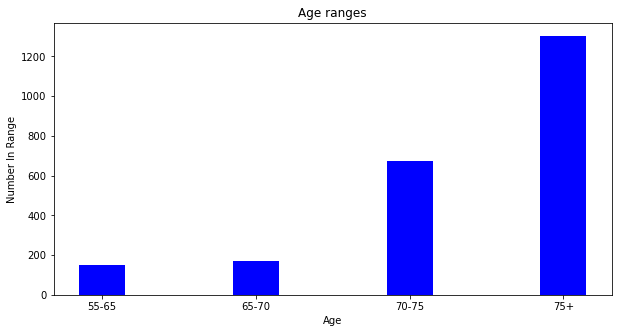

<Figure size 432x288 with 0 Axes>

In [4]:
range_5565 = np.where(np.logical_and(data_age>=55, data_age<65))
range_6570 = np.where(np.logical_and(data_age>=65, data_age<70))
range_7075 = np.where(np.logical_and(data_age>=70, data_age<75))
range_75 = np.where(data_age>=75)
data = {'55-65':len(range_5565[0]), '65-70':len(range_6570[0]), '70-75':len(range_7075[0]),
        '75+':len(range_75[0])}
#print(range_60.__len__())
ages = list(data.keys())
num_ages = list(data.values())



fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(ages, num_ages, color ='blue',
        width = 0.3)
 
plt.xlabel("Age")
plt.ylabel("Number In Range")
plt.title("Age ranges")
plt.show()

plt.savefig("../Project/Result/AGE_GROUPS_GRAPH")

In [5]:
range_5565 = np.where(np.logical_and(data_age[0]>=55, data_age[0]<65))
range_6570 = np.where(np.logical_and(data_age[0]>=65, data_age[0]<70))
range_7075 = np.where(np.logical_and(data_age[0]>=70, data_age[0]<75))
range_75 = np.where(data_age[0]>=75)
data = {'55-65':len(range_5565[0]), '65-70':len(range_6570[0]), '70-75':len(range_7075[0]),
        '75+':len(range_75[0])}
#print(range_75.__len__())

Found 5121 files belonging to 2 classes.
Found 1279 files belonging to 2 classes.


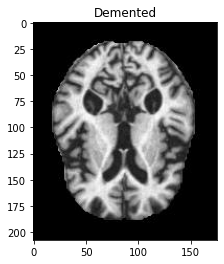

In [24]:
#class_names = ['NonDemented', 'Demented']
#num_classes = len(class_names)
#batch_size = 64
#input_shape = (208, 176, 3)
#AUTOTUNE = tf.data.experimental.AUTOTUNE
#
#def one_hot_label(image, label):
#    label = tf.one_hot(label, num_classes)
#    return image, label
#
##MNIST dataset start
#from tensorflow.keras.models import Model
#from tensorflow.keras.layers import Concatenate, Dense, LSTM, Input, concatenate
#
#train_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/train')
#test_dir = pathlib.Path('../Project/Alzheimer_s Dataset_binary/test')
#
#train_dataset = tf.keras.utils.image_dataset_from_directory(
#        train_dir,
#        labels='inferred',
#        class_names=class_names,
#        batch_size=batch_size,
#        image_size=input_shape[0:2])
#
#test_dataset = tf.keras.utils.image_dataset_from_directory(
#        test_dir,
#        labels='inferred',
#        class_names=class_names,
#        batch_size=batch_size,
#        image_size=input_shape[0:2])
#
#for images, labels, in train_dataset.take(1):
#    plt.imshow(images[0].numpy().astype('uint8'))
#    plt.title(class_names[labels[0]])
#    
#train_dataset = train_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)
#test_dataset = test_dataset.map(one_hot_label, num_parallel_calls=AUTOTUNE)

x_train shape: (60000, 28, 28, 1)
60000 Train samples
10000 Test samples


ValueError: cannot reshape array of size 47040000 into shape (784,1)

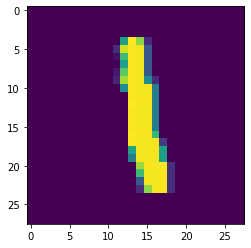

In [173]:
#Shape of the image
input_shape = (28,28,1)
new_shape = (790,1)
#Number of classifications
num_classes = 10

#assigning variables to the MNIST dataset"
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test,num_classes)


print("x_train shape:",x_train.shape)
print(x_train.shape[0],"Train samples")
print(x_test.shape[0], "Test samples")

#Ouputs an image
plt.imshow(x_train[6])


In [182]:
model = keras.Sequential(
    [
        #Defines the input sizes
        keras.Input(input_shape),
        #Creates the convolutional layer
        layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
        #Creats pooling or subsampling layer
        layers.MaxPooling2D(pool_size=(2,2)),
        #Creates the convolutional layer
        layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
        #Creats pooling or subsampling layer
        layers.MaxPooling2D(pool_size=(2,2)),
        #Flattens for the neurons\n",
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        #Creates the fully connected layer
        layers.Dense(num_classes,activation="softmax"),
    ]
)
#Prints out a summary of the model
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_98 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_119 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_99 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_120 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_107 (Flatten)        (None, 1600)              0         
_________________________________________________________________
dense_104 (Dense)            (None, 64)                102464    
_________________________________________________________________
dropout_82 (Dropout)         (None, 64)              

In [183]:
batch_size = 128
epochs = 15
model.compile(loss= "categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

history = model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.1)



Epoch 1/15
104/422 [======>.......................] - ETA: 2s - loss: 0.8957 - accuracy: 0.7112

KeyboardInterrupt: 

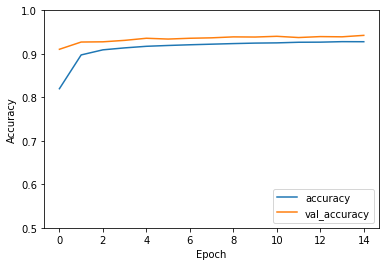

In [180]:

plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [30]:
#score = model.evaluate(x_test,y_test,verbose=0)
#print("Test loss:",score[0])
#print("Test accuracy", score[1])

In [136]:
second_input_data_x = tf.fill([60000,784,1], random.choice([64,128,192]))

In [177]:
first_shape = Input(shape= (28,28,1))
second_shape = Input(shape=(28,28,1))

first_dense = layers.Conv2D(32,kernel_size=(3,3),activation="relu")(first_shape)
first_dense = layers.MaxPooling2D()(first_dense)
first_dense = layers.Conv2D(64,kernel_size=(3,3),activation="relu")(first_dense)
first_dense = layers.MaxPooling2D(pool_size=(2,2))(first_dense)
first_dense = layers.Flatten()(first_dense)

first_dense = Model(inputs=first_shape, outputs=first_dense)

second_dense = layers.Flatten()(second_shape)
second_dense = layers.Dense(64, activation='relu')(second_dense)
second_dense = layers.Dropout(0.5)(second_dense)

second_dense = Model(inputs=second_shape, outputs=second_dense)

#merging input
merge_one = concatenate([first_dense.output, second_dense.output])

#merged inputs into output
z = layers.Flatten()
z = layers.Dense(10, activation='softmax')(merge_one)

model = Model(inputs=[first_dense.input, second_dense.input], outputs=z)

In [134]:
x_test.shape


(10000, 28, 28, 1)

In [178]:
epochs = 15

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history2 = model.fit(x=[x_train,second_input_data_x], y=y_train,validation_data=(x_test, y_test),epochs=15)

Epoch 1/15


ValueError: in user code:

    D:\anaconda3\lib\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    D:\anaconda3\lib\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\anaconda3\lib\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    D:\anaconda3\lib\site-packages\keras\engine\training.py:787 train_step
        y_pred = self(x, training=True)
    D:\anaconda3\lib\site-packages\keras\engine\base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    D:\anaconda3\lib\site-packages\keras\engine\input_spec.py:266 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 1 is incompatible with layer model_87: expected shape=(None, 28, 28, 1), found shape=(32, 784, 1)


In [129]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

NameError: name 'history2' is not defined